In [77]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

In [78]:
# set needed variables
plt.rcParams['font.family'] = 'Malgun Gothic' # font
group_order_ma = ['20대 남자', '30대 남자', '40대 남자', '50대 남자', '60대 남자', '70대 남자']
group_order_fe = ['20대 여자', '30대 여자', '40대 여자', '50대 여자', '60대 여자', '70대 여자']
group_order = ['20대 남자', '20대 여자', '30대 남자', '30대 여자', '40대 남자', '40대 여자',
'50대 남자', '50대 여자', '60대 남자', '60대 여자', '70대 남자', '70대 여자']

In [79]:
# read data / data1~6은 제공 데이터, data7은 외부 데이터(제출 파일로 첨부함)
data1 = pd.read_csv("../Data/privateData/LPOINT_BIG_COMP_01_DEMO.csv")   # cust 고객번호 ma_fem_dv 성별 ages 나이 zon_hlv 거주지코드
data2 = pd.read_csv("../Data/privateData/LPOINT_BIG_COMP_02_PDDE.csv", low_memory=False)   # cust 고객번호 rct_no 영수증번호 chnl_dv 채널구분 cop_c 제휴사코드 br_c 점포코드 pd_c 상품코드 de_dt 거래일 de_hr 거래시간 buy_am 구매가격 buy_ct 구매개수
data4 = pd.read_csv("../Data/privateData/LPOINT_BIG_COMP_04_PD_CLAC.csv")# pd_c 상품번호 pd_nm 상품명 clac_hlv_nm 카테고리 clac_mcls_nm 세부카테고리 
data5 = pd.read_csv("../Data/privateData/LPOINT_BIG_COMP_05_BR.csv")     # br_c 점포번호 cop_c 제휴사 코드 zon_hlv 카테고리 zon_mcls 세부카테고리
data6 = pd.read_csv("../Data/privateData/LPOINT_BIG_COMP_06_LPAY.csv")   # rct_no 영수증 번호 cop_c 제휴사코드 chnl_dv 채널구분 de_dt 구매일 de_hr 구매시간 buy_am 결제금액
data7 = pd.read_csv("총조사인구_성_연령별__20220808171442.csv", encoding='cp949')  # https://gsis.kwdi.re.kr/statHtml/statHtml.do?orgId=338&tblId=DT_1IN0503

* p_ages_ma_fem = \[ P(20대 남자), P(30대 남자), ......, P(60대 여자), P(70대 여자) \]

In [80]:
# p_ages_ma_fem 계산
num_ages_ma_fem = np.array([3484532, 3421613, 4033129, 4181246, 3161280, 1620676, 3132015, 3205432, 3920496, 4156357, 3319710, 1982058])
p_ages_ma_fem = num_ages_ma_fem/50133493

In [81]:
# 엘페이이용_통합
buy_data3 = pd.merge(data6, data1, on='cust', how='left')

In [82]:
# 상품구매정보_통합(data2)
buy_data2 = pd.merge(data2, data1, on='cust', how='left')
buy_data2 = pd.merge(buy_data2, data4, on='pd_c', how='left')
buy_data2 = pd.merge(buy_data2, data5, on='br_c', how='left')

In [83]:
# 남성 여성 // 20대 ~ 70대 

* Lpay_p_lst = \[ P(20대 남자 | Lpay이용자), P(30대 남자 | Lpay이용자), ............  , P(60대 여자 | Lpay이용자), P(70대 여자 | Lpay이용자) \]      
     
* 이때 bayesian rule을 이용하여 P(Lpay이용자 | 20대 남자), P(Lpay이용자 | 30대 남자)....... 를 계산함.       
 P(Lpay이용자)는 전부 동일하므로 P(20대 남자 | Lpay이용자)/P(20대 남자), P(30대 남자 | Lpay이용자)/P(30대 남자)...... 만 계산. 

In [84]:
#20대 남성
male20_Lpay = buy_data3[(buy_data3['ma_fem_dv']=='남성') & (buy_data3['ages']=='20대')]
#30대 남성
male30_Lpay = buy_data3[(buy_data3['ma_fem_dv']=='남성') & (buy_data3['ages']=='30대')]
#40대 남성
male40_Lpay = buy_data3[(buy_data3['ma_fem_dv']=='남성') & (buy_data3['ages']=='40대')]
#50대 남성
male50_Lpay = buy_data3[(buy_data3['ma_fem_dv']=='남성') & (buy_data3['ages']=='50대')]
#60대 남성
male60_Lpay = buy_data3[(buy_data3['ma_fem_dv']=='남성') & (buy_data3['ages']=='60대')]
#70대 남성
male70_Lpay = buy_data3[(buy_data3['ma_fem_dv']=='남성') & (buy_data3['ages']=='70대')]

#20대 여성
female20_Lpay = buy_data3[(buy_data3['ma_fem_dv']=='여성') & (buy_data3['ages']=='20대')]
#30대 여성
female30_Lpay = buy_data3[(buy_data3['ma_fem_dv']=='여성') & (buy_data3['ages']=='30대')]
#40대 여성
female40_Lpay = buy_data3[(buy_data3['ma_fem_dv']=='여성') & (buy_data3['ages']=='40대')]
#50대 여성
female50_Lpay = buy_data3[(buy_data3['ma_fem_dv']=='여성') & (buy_data3['ages']=='50대')]
#60대 여성
female60_Lpay = buy_data3[(buy_data3['ma_fem_dv']=='여성') & (buy_data3['ages']=='60대')]
#70대 여성
female70_Lpay = buy_data3[(buy_data3['ma_fem_dv']=='여성') & (buy_data3['ages']=='70대')]
name_lst = ['20대 남자', '30대 남자', '40대 남자', '50대 남자', '60대 남자', '70대 남자', '20대 여자', '30대 여자', '40대 여자', '50대 여자', '60대 여자', '70대 여자']
num_lst = np.array([len(male20_Lpay), len(male30_Lpay), len(male40_Lpay), len(male50_Lpay), len(male60_Lpay), len(male70_Lpay), len(female20_Lpay), len(female30_Lpay), len(female40_Lpay), len(female50_Lpay), len(female60_Lpay), len(female70_Lpay)])
Lpay_p_lst = num_lst/sum(num_lst)
Lpay_posterior_lst = num_lst/p_ages_ma_fem
Lpay_posterior_lst = Lpay_posterior_lst / np.sum(Lpay_posterior_lst)

* 각 연령,성별 별로 제품 구입 빈도를 바탕으로 각 제품 구입 확률 계산. 
* 구입횟수가 5회 이하인 제품은 목록에서 제외
* buy_p_lst = \[ 20대 남자 특정 물품 구입확률, 30대 남자 특정 물품 구입 확률, ....., 60대 여자 특정 물품 구입확률, 70대 여자 특정 물품 구입확률 \]

In [85]:
#20대 남성
male20_buy = buy_data2[(buy_data2['ma_fem_dv']=='남성') & (buy_data2['ages']=='20대')]
#30대 남성
male30_buy = buy_data2[(buy_data2['ma_fem_dv']=='남성') & (buy_data2['ages']=='30대')]
#40대 남성
male40_buy = buy_data2[(buy_data2['ma_fem_dv']=='남성') & (buy_data2['ages']=='40대')]
#50대 남성
male50_buy = buy_data2[(buy_data2['ma_fem_dv']=='남성') & (buy_data2['ages']=='50대')]
#60대 남성
male60_buy = buy_data2[(buy_data2['ma_fem_dv']=='남성') & (buy_data2['ages']=='60대')]
#70대 남성
male70_buy = buy_data2[(buy_data2['ma_fem_dv']=='남성') & (buy_data2['ages']=='70대')]

#20대 여성
female20_buy = buy_data2[(buy_data2['ma_fem_dv']=='여성') & (buy_data2['ages']=='20대')]
#30대 여성
female30_buy = buy_data2[(buy_data2['ma_fem_dv']=='여성') & (buy_data2['ages']=='30대')]
#40대 여성
female40_buy = buy_data2[(buy_data2['ma_fem_dv']=='여성') & (buy_data2['ages']=='40대')]
#50대 여성
female50_buy = buy_data2[(buy_data2['ma_fem_dv']=='여성') & (buy_data2['ages']=='50대')]
#60대 여성
female60_buy = buy_data2[(buy_data2['ma_fem_dv']=='여성') & (buy_data2['ages']=='60대')]
#70대 여성
female70_buy = buy_data2[(buy_data2['ma_fem_dv']=='여성') & (buy_data2['ages']=='70대')]

buy_lst = [male20_buy, male30_buy, male40_buy, male50_buy, male60_buy, male70_buy, female20_buy, female30_buy, female40_buy, female50_buy, female60_buy, female70_buy]
buy_cnt_lst = []
for buy_items in buy_lst:
    indexx = buy_items.groupby('pd_c').size() > 5
    buy_cnt_lst.append(buy_items.groupby('pd_c').size()[indexx])

buy_p_lst = []
for buy_cnts in buy_cnt_lst:
    buy_p_lst.append(buy_cnts/buy_cnts.sum())

* 각 성별 연령별 Lpay사용 확률을 기반으로 np.random.choice를 이용하여 특성 성별,연령층 선택.    
* 특정 성별, 연령층에 대해서 특정 제품을 구입한 빈도를 바당으로 np.random.choice를 이용하여 많이 구매한 물품 선택.



In [86]:
def recommand_product(Lpay_posterior_lst, buy_p_lst, name_lst, product_table):
    customer_base_idx = np.random.choice(range(len(Lpay_posterior_lst)), p = Lpay_posterior_lst)
    customer_base = name_lst[customer_base_idx]
    product_code_lst = buy_p_lst[customer_base_idx].index
    product_p_lst = buy_p_lst[customer_base_idx].values
    product_code = np.random.choice(product_code_lst, p=product_p_lst)
    target_row = product_table[product_table['pd_c'] == product_code]
    product_name = str(target_row['pd_nm'])
    product_name = product_name.split()[1]
    return customer_base, product_name

* recommand_product 함수를 여러번 호출하여 광고에 사용할 물품 선택

In [108]:
# 예측 데이터 100만건 생성: 약 15분 소요
dictionary = dict(group=[], item=[])
for i in tqdm(range(1000000)):
    selected_group, selected_item = recommand_product(Lpay_posterior_lst, buy_p_lst, name_lst, data4)
    dictionary['group'].append(selected_group)
    dictionary['item'].append(selected_item)

df = pd.DataFrame(dictionary)
df.to_csv("../Data/publicData/predictData.csv", index=False) # predictData.csv는 제출 파일로 첨부함

100%|██████████| 1000000/1000000 [17:37<00:00, 945.47it/s]


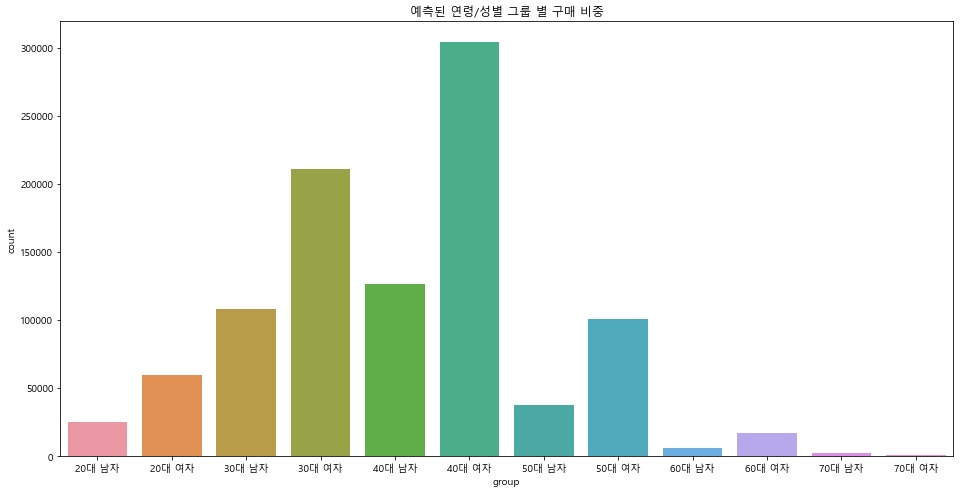

In [109]:
# 예측 데이터 분석
predictData = pd.read_csv("../Data/publicData/predictData.csv")
plt.figure(figsize=(16,8))
sns.countplot(data=predictData, x='group', order=group_order).set_title("예측된 연령/성별 그룹 별 구매 비중")
plt.show()

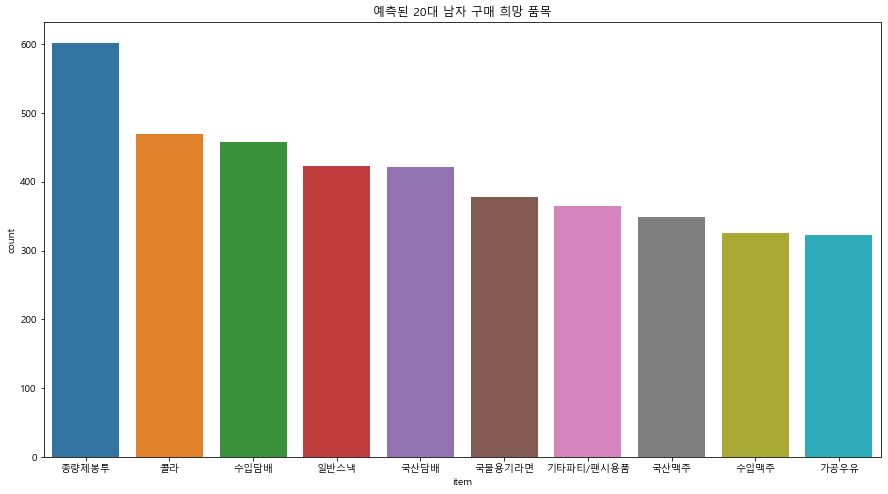

In [119]:
# 20대 남성 예측
ma20_data = predictData[predictData['group'] == '20대 남자']
plt.figure(figsize=(15,8))
sns.countplot(data=ma20_data, x='item', order=ma20_data['item'].value_counts().index[:10]).set_title("예측된 20대 남자 구매 희망 품목")
plt.show()

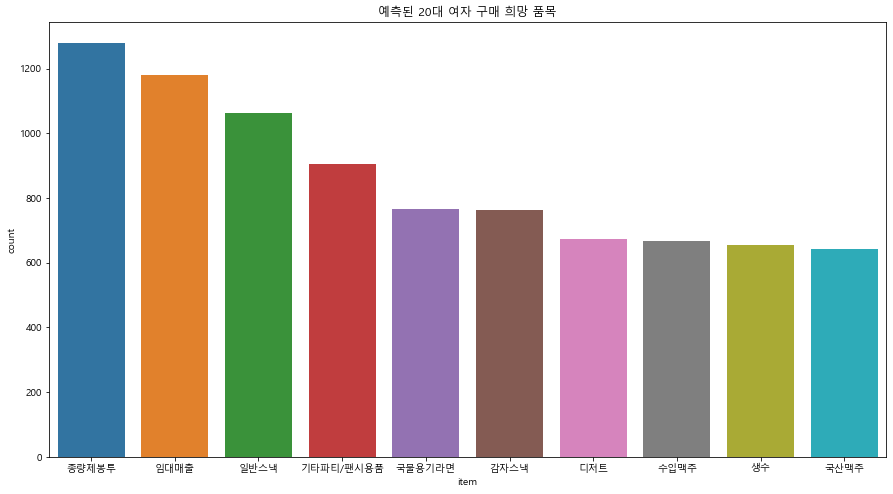

In [120]:
# 20대 여성 예측
fe20_data = predictData[predictData['group'] == '20대 여자']
plt.figure(figsize=(15,8))
sns.countplot(data=fe20_data, x='item', order=fe20_data['item'].value_counts().index[:10]).set_title("예측된 20대 여자 구매 희망 품목")
plt.show()

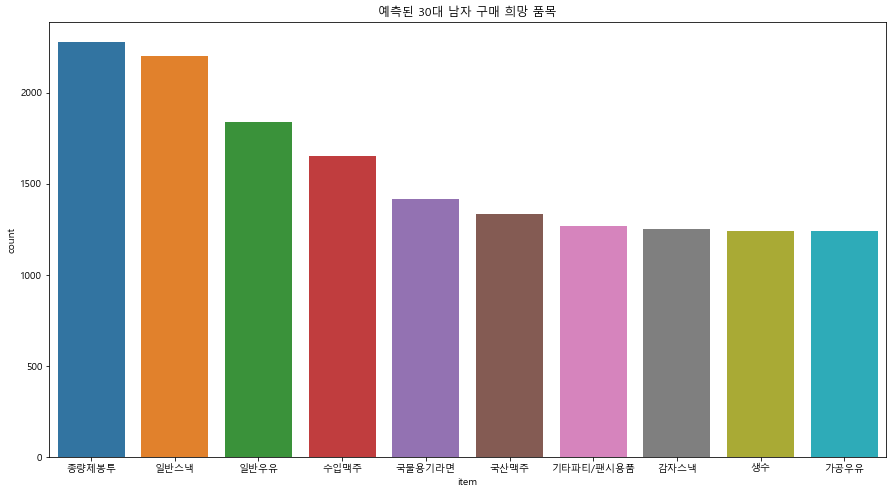

In [123]:
# 30대 남성 예측
ma30_data = predictData[predictData['group'] == '30대 남자']
plt.figure(figsize=(15,8))
sns.countplot(data=ma30_data, x='item', order=ma30_data['item'].value_counts().index[:10]).set_title("예측된 30대 남자 구매 희망 품목")
plt.show()

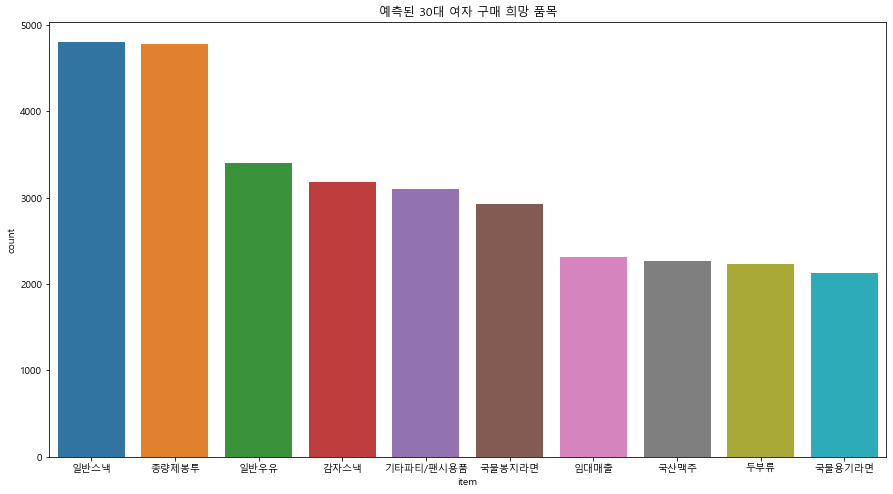

In [124]:
# 30대 여성 예측
fe30_data = predictData[predictData['group'] == '30대 여자']
plt.figure(figsize=(15,8))
sns.countplot(data=fe30_data, x='item', order=fe30_data['item'].value_counts().index[:10]).set_title("예측된 30대 여자 구매 희망 품목")
plt.show()

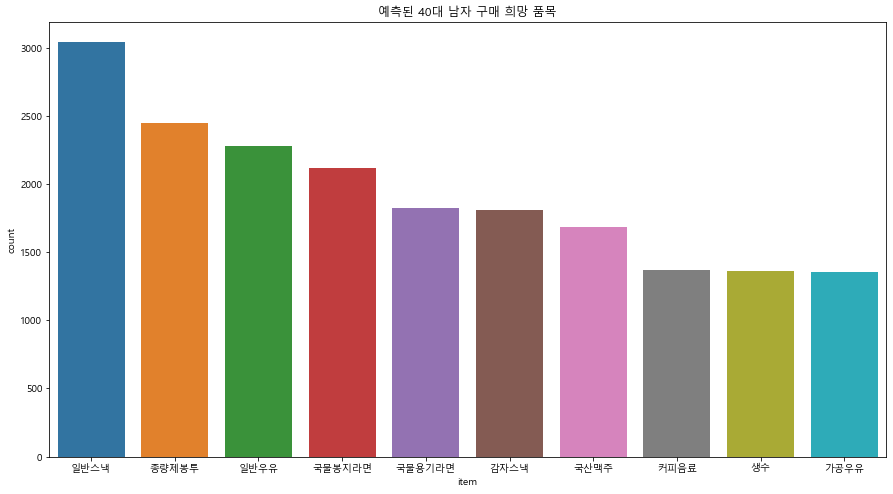

In [125]:
# 40대 남성 예측
ma40_data = predictData[predictData['group'] == '40대 남자']
plt.figure(figsize=(15,8))
sns.countplot(data=ma40_data, x='item', order=ma40_data['item'].value_counts().index[:10]).set_title("예측된 40대 남자 구매 희망 품목")
plt.show()

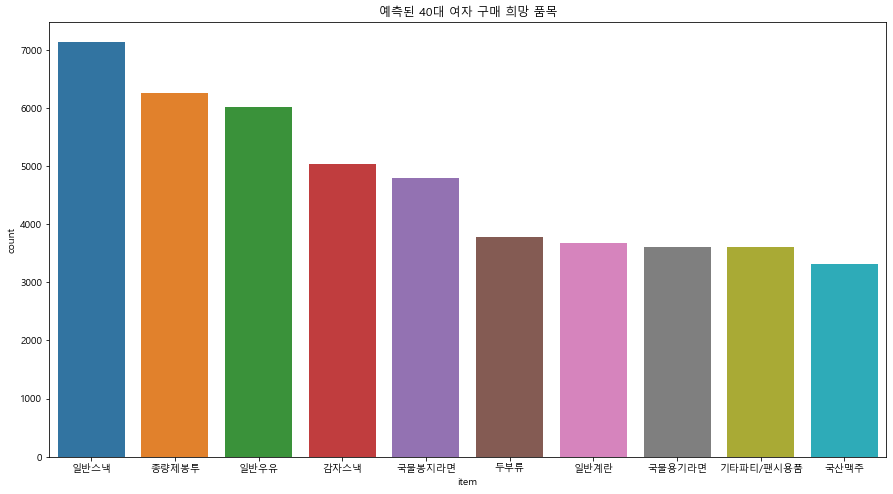

In [126]:
# 40대 여성 예측
fe40_data = predictData[predictData['group'] == '40대 여자']
plt.figure(figsize=(15,8))
sns.countplot(data=fe40_data, x='item', order=fe40_data['item'].value_counts().index[:10]).set_title("예측된 40대 여자 구매 희망 품목")
plt.show()